In [8]:
# Importing Libraries

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns


In [9]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [10]:
# Loading the dataset
# We are using the carlifornia  Housing which is  available in scikit-learn library
# Load the California housing dataset
from sklearn.datasets import fetch_california_housing

cali_housing = fetch_california_housing()

# Convert to a pandas DataFrame
data = pd.DataFrame(cali_housing.data, columns=cali_housing.feature_names)
data['MedHouseVal'] = cali_housing.target

# Explore the data
print(data.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  


In [11]:
# Spliting the data
#from sklearn.model_selection import train_test_split

# Split the data into features and target variable
X = data.drop('MedHouseVal', axis=1)
y = data['MedHouseVal']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
# Initializing and trainig the model
from sklearn.linear_model import LinearRegression

# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)


LinearRegression()

In [13]:
# Making predictions

y_pred = model.predict(X_test)


In [14]:
# Evaluating the model
#from sklearn.metrics import mean_squared_error

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 0.555891598695244


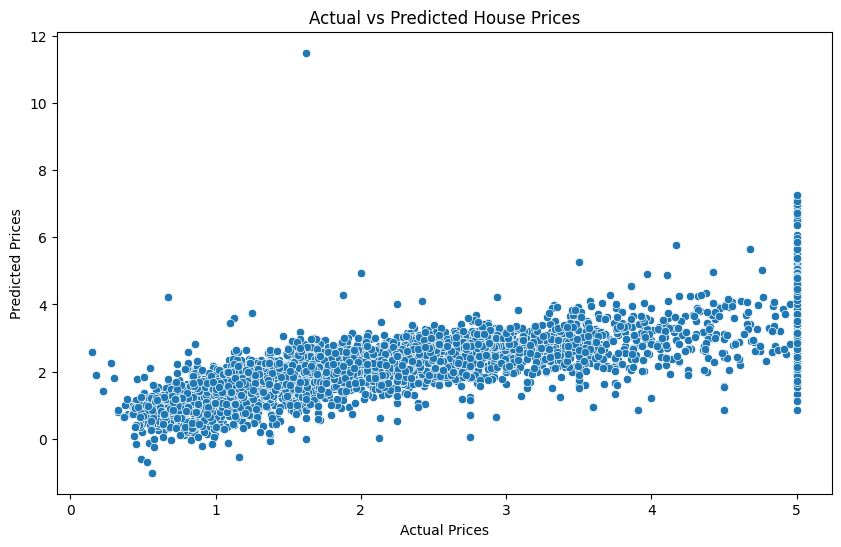

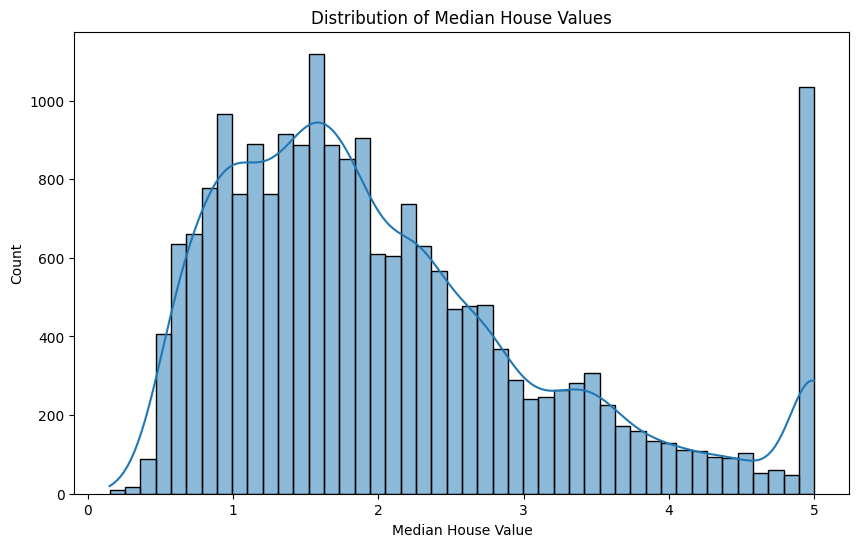

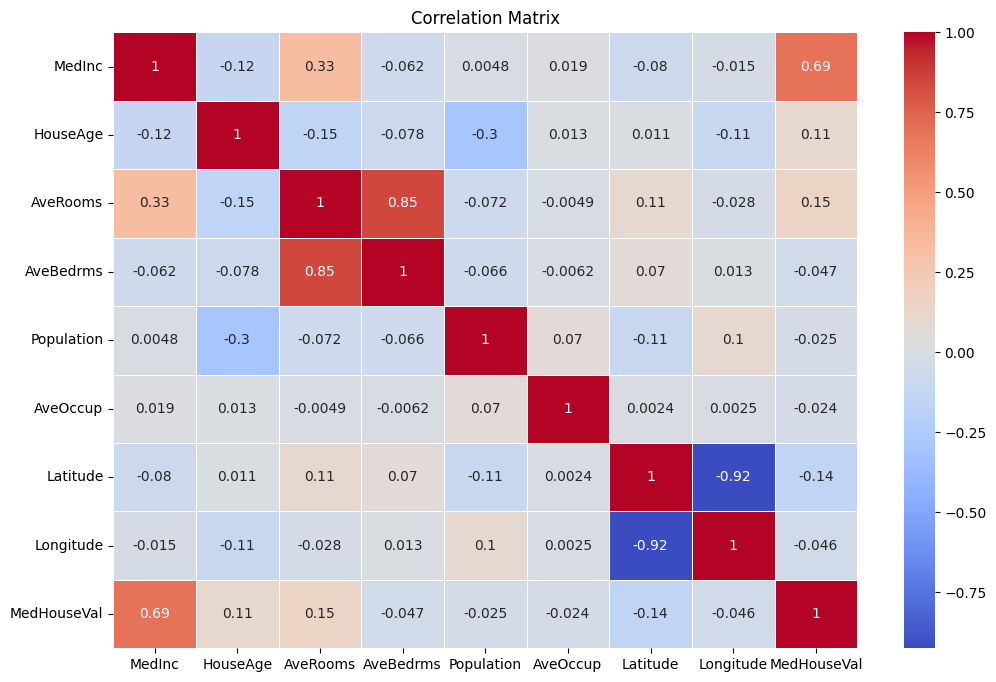

In [16]:
# Visualizing the results
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted House Prices')
plt.show()

# Visualize the distribution of the target variable
plt.figure(figsize=(10, 6))
sns.histplot(data['MedHouseVal'], kde=True)
plt.xlabel('Median House Value')
plt.title('Distribution of Median House Values')
plt.show()

# Visualize the correlation matrix
plt.figure(figsize=(12, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

   Latitude  Longitude
0     37.88    -122.23
1     37.86    -122.22
2     37.85    -122.24
3     37.85    -122.25
4     37.85    -122.25


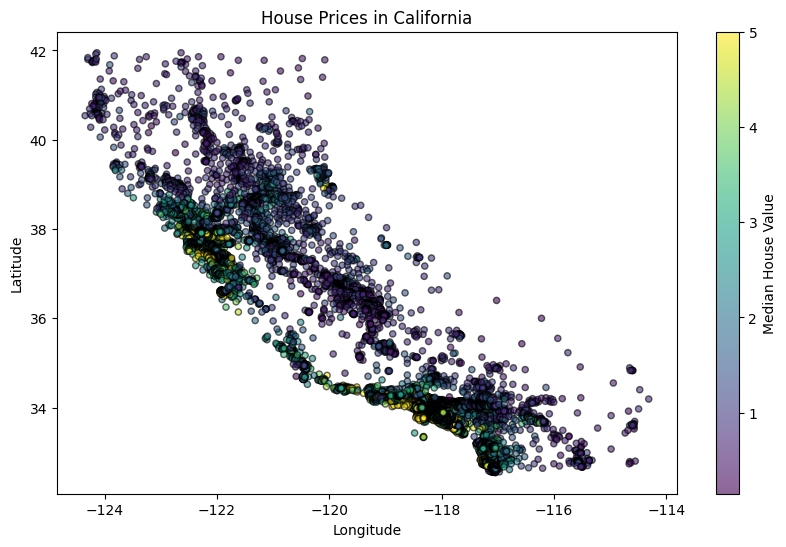

In [17]:
# Check for the geographical columns (Latitude and Longitude)
print(data[['Latitude', 'Longitude']].head())

# Visualize the house prices on a scatter plot based on geographical coordinates
plt.figure(figsize=(10, 6))
plt.scatter(data['Longitude'], data['Latitude'], c=data['MedHouseVal'], cmap='viridis', marker='o', edgecolor='k', s=20, alpha=0.6)
plt.colorbar(label='Median House Value')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('House Prices in California')
plt.show()

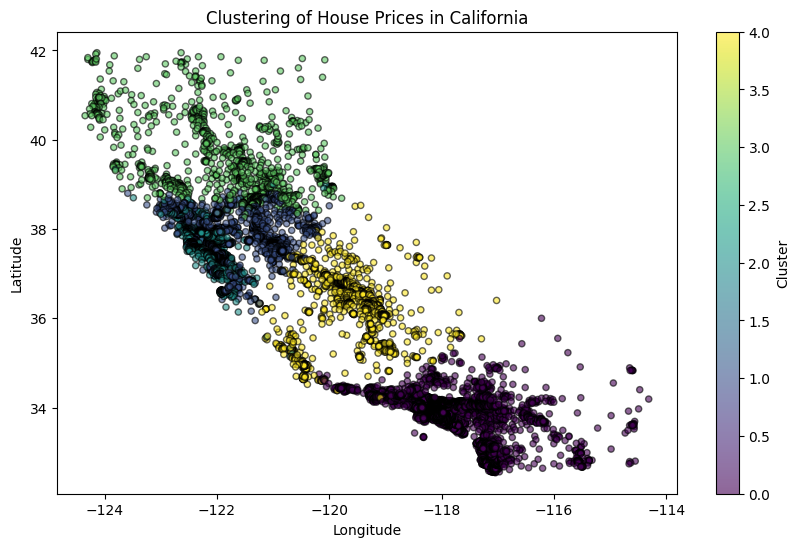

C:\Users\ALICE\AppData\Local\Temp\ipykernel_11480\3362676863.py:18: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=data['Longitude'], y=data['Latitude'], shade=True, cmap='viridis', cbar=True)


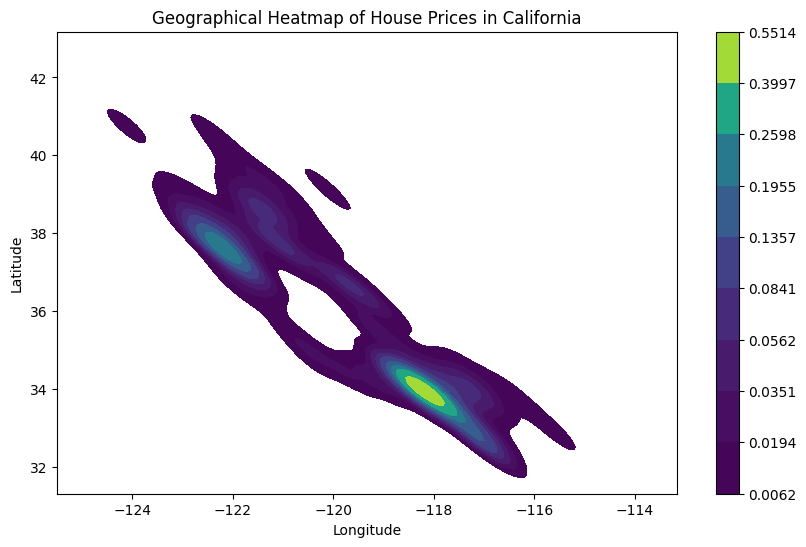

In [18]:
from sklearn.cluster import KMeans

# Perform K-Means clustering to identify regions with similar house prices
kmeans = KMeans(n_clusters=5, random_state=42)
data['Cluster'] = kmeans.fit_predict(data[['Latitude', 'Longitude', 'MedHouseVal']])

# Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(data['Longitude'], data['Latitude'], c=data['Cluster'], cmap='viridis', marker='o', edgecolor='k', s=20, alpha=0.6)
plt.colorbar(label='Cluster')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Clustering of House Prices in California')
plt.show()

# Geographical Heatmap
plt.figure(figsize=(10, 6))
sns.kdeplot(x=data['Longitude'], y=data['Latitude'], shade=True, cmap='viridis', cbar=True)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographical Heatmap of House Prices in California')
plt.show()
